In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import math
import random

**1. Describe Travelling Salesman Problem.**

**The Traveling Salesman Problem (TSP) is a classic problem in combinatorial optimization that seeks to find the shortest possible route that visits a set of given cities exactly once and returns to the original city. In the context of your recent work, the TSP involves finding the most efficient route to visit all old IITs, starting from IIT Bombay and returning to it, while visiting each IIT exactly once.**

**2. We will consider a small instance of the problem with 11 cities. The distance between any two cities is given
in TSP11.csv.**

In [ ]:
df = pd.read_csv('TSP11.csv',header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,0,29,20,21,16,31,100,12,4,31,18
1,29,0,15,29,28,40,72,21,29,41,12
2,20,15,0,15,14,25,81,9,23,27,13
3,21,29,15,0,4,12,92,12,25,13,25
4,16,28,14,4,0,16,94,9,20,16,22
5,31,40,25,12,16,0,95,24,36,3,37
6,100,72,81,92,94,95,0,90,101,99,84
7,12,21,9,12,9,24,90,0,15,25,13
8,4,29,23,25,20,36,101,15,0,35,18
9,31,41,27,13,16,3,99,25,35,0,38


**3. The pseudo-code for simulated annealing is given above. We start with an initial random state. A state is
given by a particular sequence of cities which the salesman travels. This is known as a ”tour” of the salesman.
Note that the salesman should travel to all the cities only once.**


In [ ]:
distance_matrix = df.values

In [39]:
def cost(solution):
    total_distance = 0
    for i in range(len(solution) - 1):
        total_distance += distance_matrix[solution[i]][solution[i + 1]]
    total_distance += distance_matrix[solution[-1]][solution[0]]  # Return to start
    return total_distance

def neighbor(solution):
    # Swap two random cities
    i, j = random.sample(range(len(solution)), 2)
    new_solution = solution.copy()
    new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
    return new_solution

def accept_prob(delta_cost, temp):
    if delta_cost < 0:
        return 1
    else:
        return math.exp(-delta_cost / temp)

def simulated_annealing(distance_matrix, initial_temp=1000, cooling_rate=0.999, max_iter=10000):
    cities = list(range(len(distance_matrix)))
    current_solution = random.sample(cities, len(cities))
    best_solution = current_solution.copy()
    best_cost = cost(best_solution)
    temp = initial_temp
    sol = []
    for k in range(max_iter):
        neighbor_solution = neighbor(current_solution)
        neighbor_cost = cost(neighbor_solution)
        delta_cost = neighbor_cost - cost(current_solution)
        sol.append(current_solution)
        if delta_cost < 0 or random.random() < accept_prob(delta_cost, temp):
            current_solution = neighbor_solution.copy()
            if neighbor_cost < best_cost:

                best_solution = neighbor_solution.copy()

                best_cost = neighbor_cost
                sol.append(best_cost)
        temp *= cooling_rate

    return best_solution, best_cost,sol

# Run simulated annealing
best_solution, best_cost,sol = simulated_annealing(distance_matrix)

# Print results
print("Best solution:", best_solution)
print("Best cost:", best_cost)

Best solution: [10, 1, 6, 2, 5, 9, 3, 4, 7, 0, 8]
Best cost: 253


**4. Given a tour of the salesman, compute the cost, which is the total distance travelled in that tour. Create cost()
function which takes a sequence of cities as input and calculates the total distance travelled. For example, in
a 4-city scenario, given the sequence of cities as [B,C,D,A], your function should calculate the total distance
travelled in that particular order.**

In [ ]:
def cost(distance_matrix, tour):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distance_matrix[tour[i]][tour[i + 1]]
    total_distance += distance_matrix[tour[-1]][tour[0]]  # Return to start
    return total_distance


In [ ]:
tour = [1, 2, 3, 0]

In [ ]:
total_distance = cost(distance_matrix, tour)
print("Total distance traveled:", total_distance)

Total distance traveled: 80


**5. Now we will create the neighbour() function. In TSP, the neighbour of a state is defined as the new states
obtained by swapping two consecutive cities. For example, in a 4-city case, every state has 4 neighbours and
the neighbour of [A,B,C,D] are [B,A,C,D], [A,C,B,D], [A,B,D,C], [D,B,C,A]. Your function should choose one
of the neighbours uniformly.**


In [ ]:

def neighbor(tour):
    # Choose two random indices for swapping
    i, j = random.sample(range(len(tour)), 2)
    # Create a new tour by swapping cities at indices i and j
    new_tour = tour.copy()
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    return new_tour

# Example tour
tour = [0, 1, 2, 3]  # This represents the tour [A, B, C, D]

# Generate a neighboring tour
new_tour = neighbor(tour)
print("Original tour:", tour)
print("Neighboring tour:", new_tour)

Original tour: [0, 1, 2, 3]
Neighboring tour: [1, 0, 2, 3]


**6. The acceptance probability is given by  $e^{(c_{new}-c_{cold})/T_k}$ where $c_{old}$ and $c_{new}$ are the costs of the old state and the
new state, respectively. Tk is the current temperature of the kth iteration. Explain the behaviour of acceptance
probability when (1) new cost gets worse than the current one and (2) temperature decreases.**


1) When the new cost $c_{new}$ is worse than the current cost $c_{cold}$, the acceptance probability is given by $e^{(c_{new}-c_{cold})/T_k}$. As $c_{new}$ is greater than $c_{cold}$, the numerator of the exponent is positive, resulting in a value greater than 1 for the exponent. Therefore, the acceptance probability will be less than 1, indicating that the algorithm may accept worse solutions with a probability that decreases exponentially with the difference in costs and the temperature.

2) As the temperature decreases, the acceptance probability decreases. This is because the denominator of the exponent $T_k$ decreases, leading to a larger value for the exponent. A smaller temperature causes the algorithm to be less likely to accept worse solutions, leading to a more greedy behavior and a focus on exploiting the current best solution rather than exploring new solutions.

**7. Usually, the temperature is started at a high value and slowly decreased to 0 in each iteration by a cooling
schedule. Consider the cooling schedule given by Tk+1 = αTk for α ≥ 0.80 and T0 = 1.**

**8. Run the simulated annealing algorithm and report the solution. Plot the cost function for each iteration and
plain. Choose different T0 values and observe the effect.**


In [41]:
def cost_function(sequence,df):
  cost=0
  for i in range(len(sequence)):
    city_from=sequence[i]
    if i < len(sequence)-1 :
      city_to=sequence[i+1]
    cost+=df[city_from][city_to]
  cost+=df[sequence[-1]][sequence[0]]
  return cost


def neighbour(state):
    neighbors = []
    # Generate neighbors by swapping consecutive cities
    for i in range(len(state) - 1):
        neighbor = state[:]  # Make a copy of the current state
        neighbor[i], neighbor[i + 1] = neighbor[i + 1], neighbor[i]  # Swap two consecutive cities
        neighbors.append(neighbor)
    # Wrap around to consider the last and first cities as consecutive
    neighbor = state[:]
    neighbor[-1], neighbor[0] = neighbor[0], neighbor[-1]
    neighbors.append(neighbor)
    # Choose one neighbor uniformly at random
    return random.choice(neighbors)

def simulated_tsp(nbg_state,T,alpha,max_itr,df):

  nbg_state=neighbour(nbg_state)

  best_path=[]
  best_solution=[]

  for k in range(max_itr):
    # print(k)

      cost_old=cost_function(nbg_state,df)
      nbg_state_new=neighbour(nbg_state)
      solution=cost_old
      cost_new=cost_function(nbg_state_new,df)
      T=alpha*T

      # print('old_costc',cost_old)
      # print('new_cost',cost_new)
      if cost_new<=cost_old:
        nbg_state=nbg_state_new
        solution_new=cost_new
      else:
        prob=np.exp(-(cost_new-cost_old)/T)
        # print(prob)
        # print(nbg_state,nbg_state_new)
        p=[prob,1-prob]
        nbg_state= random.choices([nbg_state_new,nbg_state], p)[0]
        # print(nbg_state)
        solution_new=cost_function(nbg_state,df)

      if solution>=solution_new:
        solution=solution_new
      best_solution.append(solution)
      best_path.append(nbg_state)
  return best_solution,best_path

nbg_state=([0,1,2,3,4,5,6,7,8,9,10])
T=1
alpha=0.8
max_itr=1000
best_solution,best_path=simulated_tsp(nbg_state,T,alpha,max_itr,df)

In [42]:
optimal_cost=min(best_solution)
print('optimal_solution:',optimal_cost)
for i in range(len(best_path)):
  if best_solution[i]==optimal_cost:
    best_route=best_path[i]
print('best possible route:',best_route)

optimal_solution: 301
best possible route: [1, 2, 0, 4, 3, 9, 5, 6, 7, 8, 10]


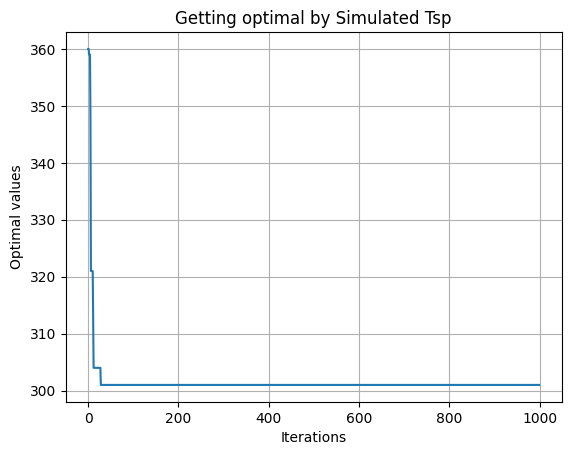

In [43]:
iter=[x for x in range(1000)]
plt.plot(iter,best_solution)
plt.xlabel('Iterations')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)

plt.show()

In [44]:
T_value=[0.01,0.05,0.1,0.5,1,2,3,4,5]
sol=[]
for T in T_value:
  print("FOR VALUE OF T:",T)
  nbg_state=([0,1,2,3,4,5,6,7,8,9,10])

  alpha=0.8
  max_itr=1000
  best_solution,best_path=simulated_tsp(nbg_state,T,alpha,max_itr,df)
  optimal_cost=min(best_solution)
  print('optimal cost:',optimal_cost)
  for i in range(len(best_path)):
    if best_solution[i]==optimal_cost:
      best_route=best_path[i]
  print('best possible route:',best_route)
  sol.append(min(best_solution))
  print('___________________________________________________')

FOR VALUE OF T: 0.01
optimal cost: 315
best possible route: [1, 2, 0, 4, 3, 6, 5, 9, 7, 8, 10]
___________________________________________________
FOR VALUE OF T: 0.05
optimal cost: 345
best possible route: [0, 1, 2, 4, 5, 3, 7, 8, 10, 6, 9]
___________________________________________________
FOR VALUE OF T: 0.1
optimal cost: 301
best possible route: [1, 2, 0, 4, 3, 9, 5, 6, 7, 8, 10]
___________________________________________________
FOR VALUE OF T: 0.5
optimal cost: 301
best possible route: [1, 2, 0, 4, 3, 9, 5, 6, 7, 8, 10]
___________________________________________________
FOR VALUE OF T: 1
optimal cost: 338
best possible route: [9, 1, 2, 5, 3, 4, 6, 10, 7, 8, 0]
___________________________________________________
FOR VALUE OF T: 2
optimal cost: 280
best possible route: [10, 1, 2, 4, 3, 9, 5, 6, 7, 0, 8]
___________________________________________________
FOR VALUE OF T: 3
optimal cost: 341
best possible route: [0, 1, 2, 5, 3, 4, 7, 8, 10, 6, 9]
__________________________________

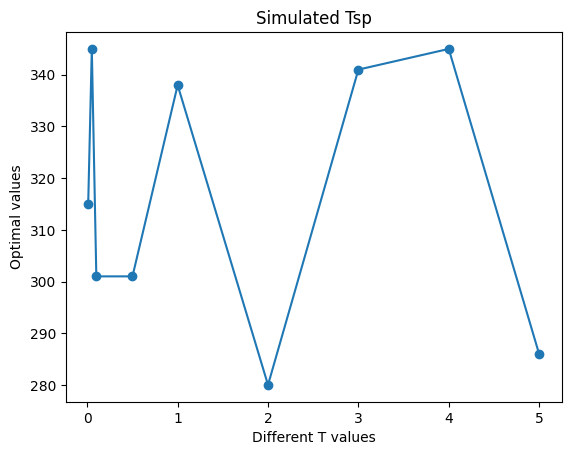

In [45]:
#ploting values of T and best optimal value
plt.plot(T_value,sol,marker='o')
plt.xlabel('Different T values')
plt.ylabel('Optimal values')
plt.title('Simulated Tsp')
plt.show()

**9. Come up with another cooling schedule (not of the form Tk+1 = αTk) and comment on the change in behaviour
of the algorithm**


One alternative cooling schedule that could be used is the logarithmic cooling schedule. In this schedule, the temperature decreases logarithmically over time. The formula for updating the temperature would be:

$T_{k+1} = \frac{T_k}{log(k+1)}$

where
k is the current iteration.

In this schedule, the temperature decreases slower as the iteration count increases. Initially, the temperature drops quickly but then slows down as the logarithm increases more slowly over time. This means that early in the algorithm, the temperature decreases rapidly, allowing for extensive exploration of the solution space and escaping local optima. However, as the algorithm progresses, the temperature decreases more slowly, allowing for more exploitation of promising regions of the solution space.

In [46]:
def simulated_tsp_with_new_T(nbg_state,T,alpha,max_itr,df):

  nbg_state=neighbour(nbg_state)

  best_path=[]
  best_solution=[]

  for k in range(max_itr):
    # print(k)

      cost_old=cost_function(nbg_state,df)
      nbg_state_new=neighbour(nbg_state)
      solution=cost_old
      cost_new=cost_function(nbg_state_new,df)
      T=T*(1/(np.log(k+1)))# Different value of alpha for cooling or decreasing the temperature

      # print('old_costc',cost_old)
      # print('new_cost',cost_new)
      if cost_new<=cost_old:
        nbg_state=nbg_state_new
        solution_new=cost_new
      else:
        prob=np.exp(-(cost_new-cost_old)/T)
        # print(prob)
        # print(nbg_state,nbg_state_new)
        p=[prob,1-prob]
        nbg_state= random.choices([nbg_state_new,nbg_state], p)[0]
        # print(nbg_state)
        solution_new=cost_function(nbg_state,df)

      if solution>=solution_new:
          solution=solution_new
      best_solution.append(solution)
      best_path.append(nbg_state)
  return best_solution,best_path

nbg_state=([0,1,2,3,4,5,6,7,8,9,10])
T=1
alpha=0.8
max_itr=1000
best_solution,best_path=simulated_tsp_with_new_T(nbg_state,T,alpha,max_itr,df)

<ipython-input-46-143d465b7f72>:15: RuntimeWarning: divide by zero encountered in scalar divide
  T=T*(1/(np.log(k+1)))# Different value of alpha for cooling or decreasing the temperature


optimal_solution: 290
best possible route: [1, 6, 4, 5, 9, 7, 8, 3, 0, 2, 10]


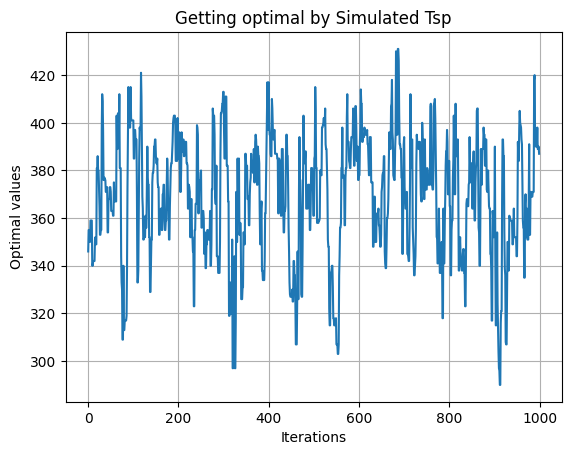

In [47]:
optimal_cost=min(best_solution)
print('optimal_solution:',optimal_cost)
for i in range(len(best_path)):
  if best_solution[i]==optimal_cost:
    best_route=best_path[i]
print('best possible route:',best_route)
import matplotlib.pyplot as plt
iter=[x for x in range(1000)]
plt.plot(iter,best_solution)
plt.xlabel('Iterations')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)

plt.show()

##**Observation**

Compared to the geometric cooling schedule, the logarithmic cooling schedule may lead to a more balanced exploration-exploitation trade-off. It might allow the algorithm to explore the solution space thoroughly in the early stages while still dedicating significant effort to refining promising solutions later on. This could potentially result in finding high-quality solutions more efficiently, especially in complex problem landscapes. However, the effectiveness of this cooling schedule would depend on the specific characteristics of the problem being solved and might require tuning of parameters such as the initial temperature and the rate of decrease in the logarithmic function.

In [48]:
T_value=[0.01,0.05,0.1,0.5,1,2,3,4,5]
sol=[]
for T in T_value:
  print("FOR VALUE OF T:",T)
  nbg_state=([0,1,2,3,4,5,6,7,8,9,10])

  alpha=0.8
  max_itr=1000
  best_solution,best_path=simulated_tsp_with_new_T(nbg_state,T,alpha,max_itr,df)
  optimal_cost=min(best_solution)
  print('optimal cost:',optimal_cost)
  for i in range(len(best_path)):
    if best_solution[i]==optimal_cost:
      best_route=best_path[i]
  print('best possible route:',best_route)
  sol.append(min(best_solution))
  print('___________________________________________________')

FOR VALUE OF T: 0.01


<ipython-input-46-143d465b7f72>:15: RuntimeWarning: divide by zero encountered in scalar divide
  T=T*(1/(np.log(k+1)))# Different value of alpha for cooling or decreasing the temperature


optimal cost: 302
best possible route: [1, 10, 6, 7, 3, 4, 8, 5, 0, 9, 2]
___________________________________________________
FOR VALUE OF T: 0.05
optimal cost: 285
best possible route: [10, 9, 3, 5, 4, 7, 1, 6, 2, 8, 0]
___________________________________________________
FOR VALUE OF T: 0.1
optimal cost: 283
best possible route: [5, 6, 9, 3, 4, 7, 2, 1, 10, 0, 8]
___________________________________________________
FOR VALUE OF T: 0.5
optimal cost: 286
best possible route: [1, 4, 0, 8, 5, 9, 3, 2, 10, 6, 7]
___________________________________________________
FOR VALUE OF T: 1
optimal cost: 295
best possible route: [2, 7, 4, 3, 10, 1, 8, 6, 0, 9, 5]
___________________________________________________
FOR VALUE OF T: 2
optimal cost: 292
best possible route: [3, 7, 10, 8, 1, 6, 2, 0, 4, 5, 9]
___________________________________________________
FOR VALUE OF T: 3
optimal cost: 291
best possible route: [6, 9, 5, 4, 7, 2, 1, 10, 8, 0, 3]
___________________________________________________
FOR

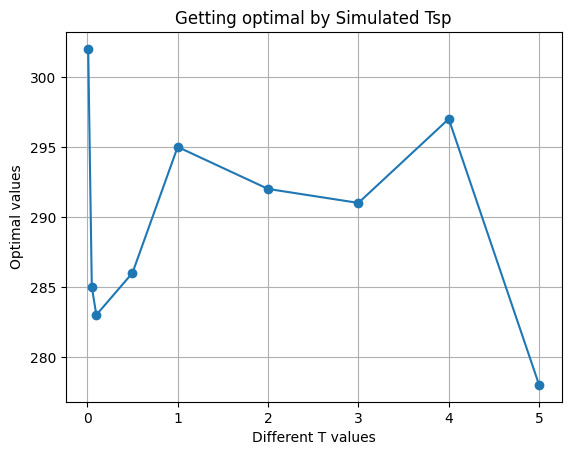

In [49]:
plt.plot(T_value,sol,marker='o')
plt.xlabel('Different T values')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)
plt.show()

**10. Do the same for the slightly larger problem with 48 cities**

In [50]:
df48=pd.read_csv('TSP48.csv',header=None)


optimal_solution: 278
best possible route: [10, 7, 4, 0, 8, 9, 5, 2, 3, 1, 6]


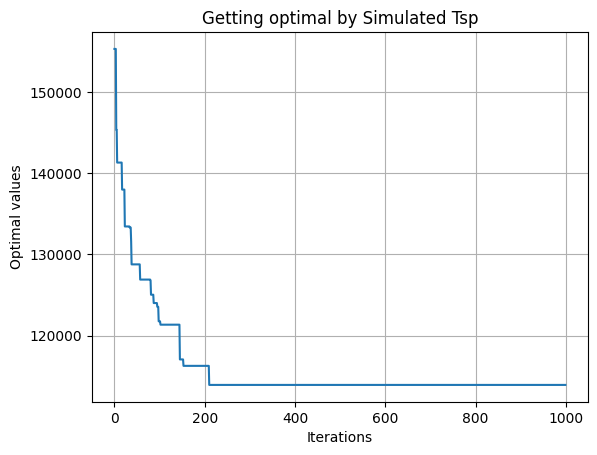

In [52]:
T=1
alpha=0.8
max_itr=1000
nbg_state=[i for i in range(len(df48))]
best_solution,best_path=simulated_tsp(nbg_state,T,alpha,max_itr,df48)

print('optimal_solution:',optimal_cost)
for i in range(len(best_path)):
  if best_solution[i]==optimal_cost:
    best_route=best_path[i]
print('best possible route:',best_route)

iter=[x for x in range(1000)]
plt.plot(iter,best_solution)
plt.xlabel('Iterations')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)

plt.show()

In [53]:
T_value=[0.01,0.05,0.1,0.5,1,2,3,4,5]
sol=[]
for T in T_value:
  print("FOR VALUE OF T:",T)
  nbg_state=[i for i in range(len(df48))]

  alpha=0.8
  max_itr=1000
  best_solution,best_path=simulated_tsp(nbg_state,T,alpha,max_itr,df48)
  optimal_cost=min(best_solution)
  print('optimal cost:',optimal_cost)
  for i in range(len(best_path)):
    if best_solution[i]==optimal_cost:
      best_route=best_path[i]
  print('best possible route:',best_route)
  sol.append(min(best_solution))
  print('___________________________________________________')

FOR VALUE OF T: 0.01
optimal cost: 122049
best possible route: [1, 0, 2, 3, 4, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 16, 18, 17, 19, 20, 22, 21, 23, 25, 28, 24, 29, 26, 27, 30, 32, 31, 34, 33, 35, 36, 37, 39, 40, 41, 38, 43, 42, 44, 46, 45, 47]
___________________________________________________
FOR VALUE OF T: 0.05
optimal cost: 122311
best possible route: [0, 1, 3, 4, 2, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 17, 18, 16, 19, 20, 22, 21, 25, 23, 24, 29, 26, 27, 30, 28, 31, 32, 33, 34, 36, 35, 37, 39, 38, 41, 40, 43, 42, 46, 44, 47, 45]
___________________________________________________
FOR VALUE OF T: 0.1
optimal cost: 112351
best possible route: [2, 1, 3, 4, 47, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 16, 18, 17, 19, 20, 22, 21, 25, 23, 24, 29, 26, 27, 30, 32, 33, 28, 34, 31, 36, 35, 37, 39, 40, 41, 38, 43, 42, 44, 46, 45, 0]
___________________________________________________
FOR VALUE OF T: 0.5
optimal cost: 121477
best possible route: [0, 1, 3, 4, 2, 5, 6, 8, 7, 9, 10, 11, 12, 13

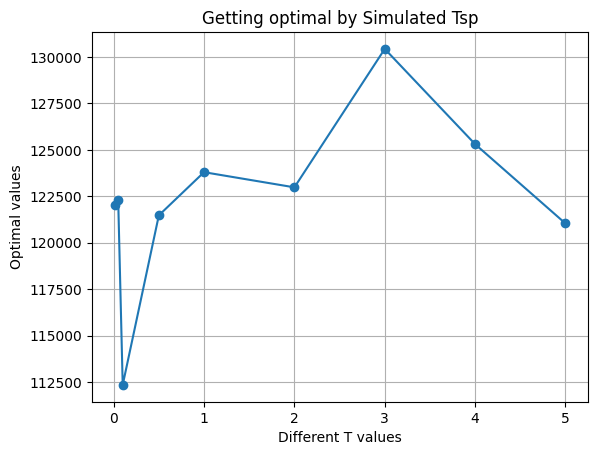

In [54]:
#ploting values of T and best optimal value
plt.plot(T_value,sol,marker='o')
plt.xlabel('Different T values')
plt.ylabel('Optimal values')
plt.title('Getting optimal by Simulated Tsp')
# plt.legend()
plt.grid(True)
plt.show()